# Controlling CSM from an external source - Read/Write

This notebook presents a method to inteact with CSM throgh a brwoser automation server. In this set-up a chrome driver is called by the selenuim package to control the web page created by CSM when running simulations. 

This example interacts with a dual simple state machine in CSM. Siginals are set from jupyer lab to the exposed web brwoser at the provided CSM ip address.

In [154]:
# import the selenium webdriver package
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import os

In [155]:
# Set the driver options
options = webdriver.ChromeOptions()
#options.add_argument("--headless")
options.add_argument("--start-maximized")
options.add_argument('--log-level=3')

# set the ipaddress of the CSM simulation browser
csm_ip = "http://192.168.0.2:8080/sineGen.html"

# note if you have updated the ui and the old one shows 
# up then you need to update the ip
# or press the Generate_HTML button on the ui model diagram

In [156]:
# Provide the path of chromedriver present on your system.
driver = webdriver.Chrome(executable_path="C:/temp/chromedriver_win32/chromedriver.exe",
                              chrome_options=options)
#driver.set_window_size(600,800)

C:\Users\jdehart\AppData\Local\Temp\ipykernel_94104\2477209642.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="C:/temp/chromedriver_win32/chromedriver.exe",
C:\Users\jdehart\AppData\Local\Temp\ipykernel_94104\2477209642.py:2: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path="C:/temp/chromedriver_win32/chromedriver.exe",


In [157]:
# Send a get request to the url
driver.get(csm_ip)
time.sleep(5) # give it a sec to open

Below are examples of sending commands directly to the buttons on the csm brwoser

In [136]:
# finding the button using xpath
button = driver.find_element_by_xpath('//button[normalize-space()="Start"]').click()

C:\Users\jdehart\AppData\Local\Temp\ipykernel_94104\816641514.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button = driver.find_element_by_xpath('//button[normalize-space()="Start"]').click()


In [41]:
# finding the button using ID
button = driver.find_element_by_id("TerminateButton").click() #restart

C:\Users\jdehart\AppData\Local\Temp\ipykernel_94104\3422671095.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  button = driver.find_element_by_id("TerminateButton").click() #restart


In [39]:
# finding the button using ID
button = driver.find_element_by_id("RestartButton").click() #restart

C:\Users\jdehart\AppData\Local\Temp\ipykernel_94104\3671032438.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  button = driver.find_element_by_id("RestartButton").click() #restart


Here is a fun example of using buttons in Jupyterlab to externally run the simulation

In [158]:
# Build a list of buttons for pressing
from ipywidgets import Button, HBox
csmStates = ['Start', 'Pause', 'Resume', 'Terminate', "ReStart"]
switch = [Button(description=name) for name in csmStates]
combined = HBox([items for items in switch])

def stateSignal(btn):
    if btn.description == "Start":
        button = driver.find_element_by_xpath('//button[normalize-space()="Start"]').click()
        
    if btn.description == "Pause":
        button = driver.find_element_by_id("PauseButton").click() #restart
        
    if btn.description == "Resume":
        button = driver.find_element_by_id("ResumeButton").click() #restart
        
    if btn.description == "Terminate":
        button = driver.find_element_by_id("TerminateButton").click() #restart
        
    if btn.description == "ReStart":
        button = driver.find_element_by_id("RestartButton").click() #restart

    
for n in range(len(csmStates)):
    switch[n].on_click(stateSignal)

display(combined)

# for fun lets grab some data from a csm session

In [159]:
# Create a list
dataList = []
count = 0

In [160]:
# Capture the text data from the 'display' item
while count < 100:
    dataList.append(driver.find_element_by_name("display").text)
    count = count + 1

C:\Users\jdehart\AppData\Local\Temp\ipykernel_94104\1226085620.py:3: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  dataList.append(driver.find_element_by_name("display").text)


In [161]:
# Convert from string to fload
test_list = list(map(float, dataList))

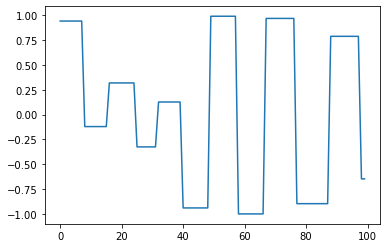

In [162]:
# Plot the data
import matplotlib.pyplot as plt
plt.plot(test_list)